`palettecleanser` is a python library that allows single line conversions between images and colormaps for data visualization. `palettecleanser` supports `matplotlib`, `seaborn`, and `plotly` libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

## Introduction

In [2]:
from functions import convert_to_cmap
from classes import CMap

`palettecleanser` reads files into a native `CMap` object. This handles the parsing and extraction of colors into colormaps. Later wrapper functions will enable single line functionality, but for displaying all cmaps generated from an image, interacting with the base `CMap` object is easiest

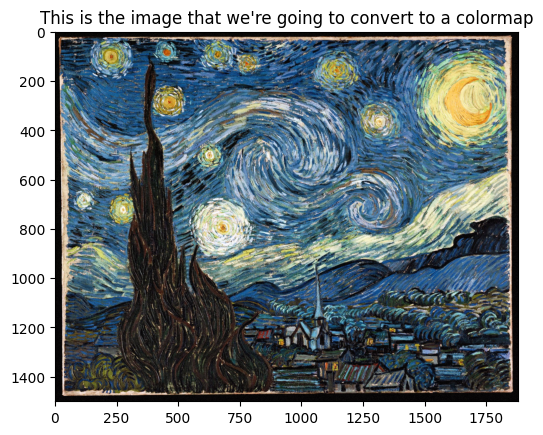

In [3]:
fname = 'vangogh.jpg'
plt.imshow(plt.imread(f'images/{fname}'))
plt.title("This is the image that we're going to convert to a colormap")
plt.show()

To convert to a colormap, load the image into a `CMap` object. The `CMap` object enables displaying of all generatable colormaps via. the `display_all_cmaps` method. 

Attributes such as numbers of colors generated (`n_colors`) can be adjusted via. the class initialization call.

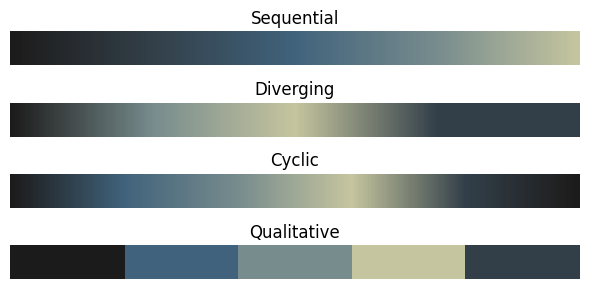

In [4]:
# display all colormaps available
vangogh_obj = CMap(f'images/{fname}')
vangogh_obj.display_all_cmaps()

For a one-line conversion of an image to a colormap, the `convert_to_cmap` function can be used. Note that this only generates a single base colormap. For using a range of colormaps across plots, initializing as a `CMap` is recommended

In [5]:
# one-liner for conversion of image to single colormap
vangogh = convert_to_cmap(f'images/{fname}')

## Examples plots

The function `display_example_plots` applies the generated color map to multiple different plot types & libraries for ease of visualization

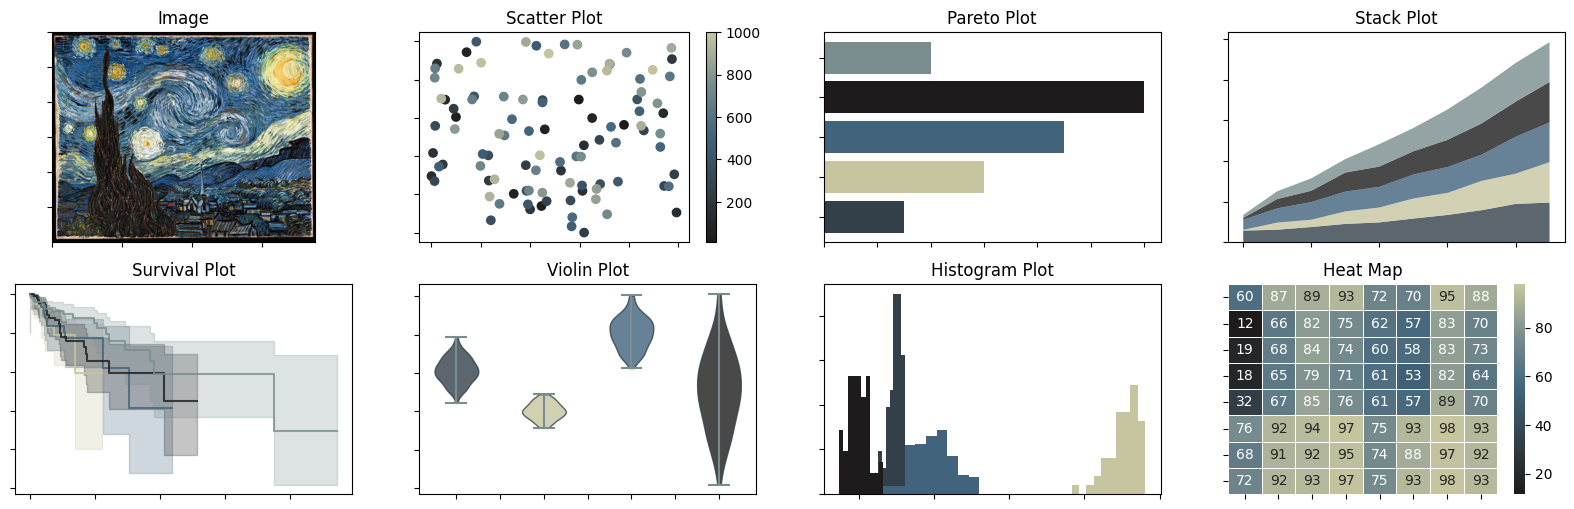

In [6]:
vangogh_obj.display_example_plots()

### matplotlib

Because the different libraries contain different representations of colormaps, `palettecleanser` CMaps can be initialized with a `library` argument to specify which library the colormap is going to be used with.

Colormaps can be called in the following two ways

In [7]:
# this is the entire object that contains all colormaps. Use this when a variety of colormaps (sequential, quantitative, etc) may be used across multiple plot types
vangogh_mpl_obj = CMap(f'images/{fname}')

# this is a single colormap. Used this when only a single colormap is needed for a single plot
vangogh_mpl_sequential = convert_to_cmap(f'images/{fname}', library='matplotlib')

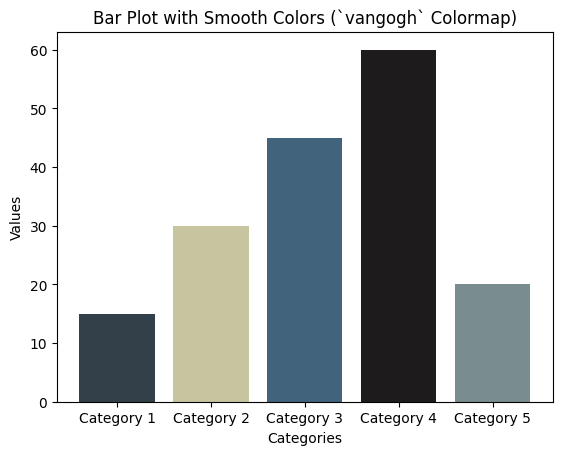

In [8]:
# example bar plot
categories = ['Category 1', 'Category 2', 'Category 3', 'Category 4', 'Category 5']
values = [15, 30, 45, 60, 20]

# plot using the qualitative cmap
plt.bar(categories, values, color=vangogh_mpl_obj.qualitative_cmap)
plt.title(f'Bar Plot with Smooth Colors (`vangogh` Colormap)')
plt.xlabel('Categories')
plt.ylabel('Values')
plt.show()

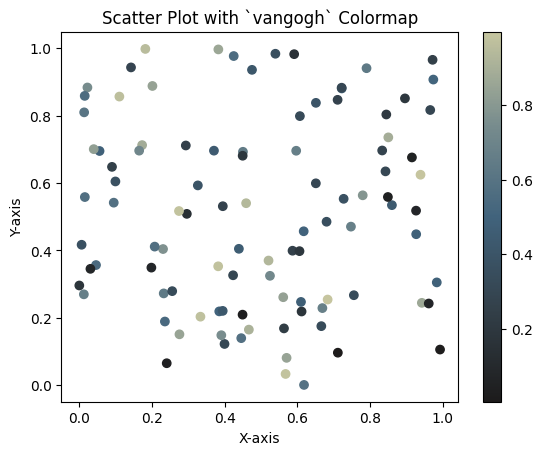

In [9]:
# example scatter plot
x = np.random.rand(100)
y = np.random.rand(100)
colors = np.random.rand(100)  # Defining colors based on data range

# plot using the single colormap
plt.scatter(x, y, c=colors, cmap=vangogh_mpl_sequential)
plt.colorbar()
plt.title('Scatter Plot with `vangogh` Colormap')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

### seaborn

Similarly to `matplotlib`, plotting with `seaborn` can be called either via. the `CMap` object itself or for an individual cmap via the `convert_to_cmap` function

In [10]:
# this is the entire cmap object containing all colormaps
# for this initialization, we'll init with `n_colors`=6 since later plots can have 6+ categories
vangogh_obj = CMap(f'images/{fname}', n_colors=6) 

# this is an individual colormap
vangogh_sns = convert_to_cmap(f'images/{fname}', n_colors=6, library='seaborn')

<Axes: xlabel='total_bill', ylabel='tip'>

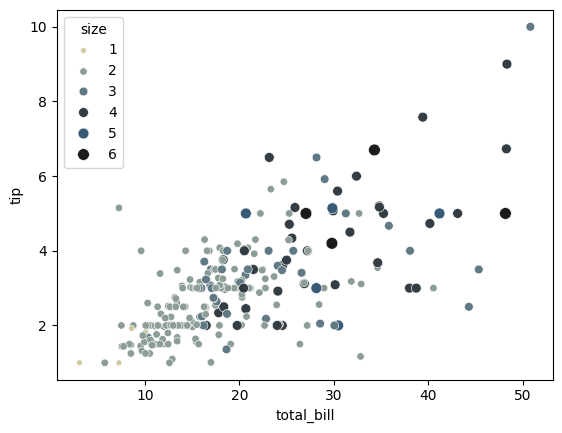

In [11]:
tips = sns.load_dataset('tips')
sns.scatterplot(data=tips, x="total_bill", y="tip", hue='size', size='size', palette=vangogh_sns)

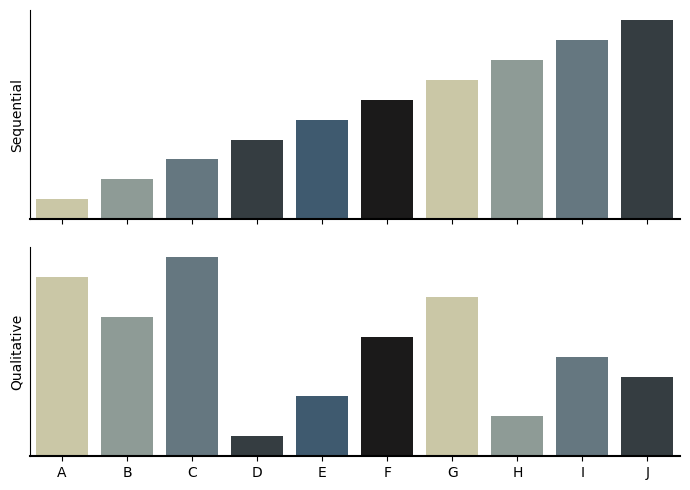

In [12]:
# example bar plot - https://seaborn.pydata.org/examples/palette_choices.html
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(7, 5), sharex=True)

rs = np.random.RandomState(8)
# generate some sequential data
x = np.array(list("ABCDEFGHIJ"))
y1 = np.arange(1, 11)
sns.barplot(x=x, y=y1, hue=x, palette=vangogh_sns, ax=ax1)
ax1.axhline(0, color="k", clip_on=False)
ax1.set_ylabel("Sequential")

# randomly reorder the data to make it qualitative
y2 = rs.choice(y1, len(y1), replace=False)
sns.barplot(x=x, y=y2, hue=x, palette=vangogh_sns, ax=ax2)
ax2.axhline(0, color="k", clip_on=False)
ax2.set_ylabel("Qualitative")

# finalize the plot
sns.despine(bottom=True)
plt.setp(f.axes, yticks=[])
plt.tight_layout(h_pad=2)


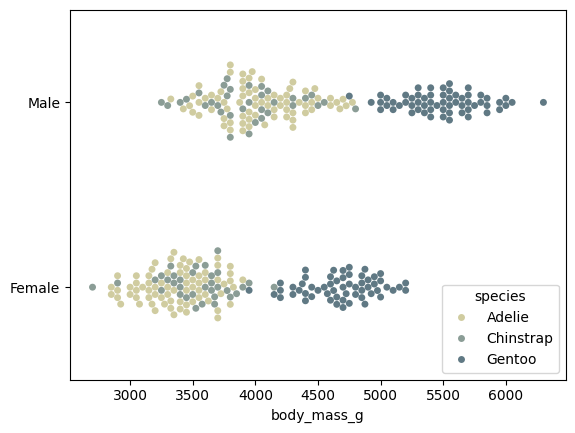

In [13]:
# example scatterplot - https://seaborn.pydata.org/examples/scatterplot_categorical.html

df = sns.load_dataset("penguins")

# draw a categorical scatterplot to show each observation
ax = sns.swarmplot(data=df, x="body_mass_g", y="sex", hue="species", palette=vangogh_sns)
ax.set(ylabel="")
plt.show()


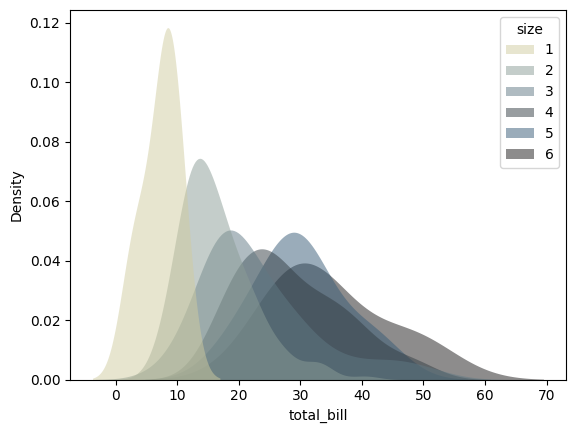

In [14]:
# example KDE plot - https://seaborn.pydata.org/generated/seaborn.kdeplot.html
tips = sns.load_dataset("tips")
sns.kdeplot(
   data=tips, x="total_bill", hue="size",
   fill=True, common_norm=False, palette=vangogh_sns,
   alpha=.5, linewidth=0,
)
plt.show()

### Plotly

`plotly` generally uses arguments to the `color_discrete_sequence` or `color_continuous_scale` in order to specify colormaps. Using the following code to define a colormap & calling that colormap in these function calls will yield the desired result

Note that with `plotly`, explicitly calling the cmap object is unnecessary for most cases

In [15]:
vangogh_px = convert_to_cmap(f'images/{fname}', library='plotly')

In [16]:
# reuse same dataset as `seaborn` example for a continuous color scale
# apply colormap to `color_continuous_scale`
fig = px.scatter(tips, x="total_bill", y="tip", color="tip", color_continuous_scale=vangogh_px)
fig.show()

In [17]:
# discrete color map - apply colormap to `color_discrete_sequence`
fig = px.scatter(tips, x="total_bill", y="tip", color="day", color_discrete_sequence=vangogh_px)
fig.show()

In [18]:
# example bar plot with discrete color sequence
df = px.data.medals_long()
# add some example data to increase color palette
df2 = pd.DataFrame([['Antarctica', 'gold', 10]], columns=['nation','medal','count'])
df3 = pd.DataFrame([['Atlantis', 'bronze', 4]], columns=['nation','medal','count'])

df = pd.concat([df, df2, df3])

fig = px.bar(df, x="medal", y="count", color="nation", color_discrete_sequence=vangogh_px)
fig.show()
